# Figure - mixed probes

In [1]:
import os
work_dir = "H:/workspace/ptyrad_paper"
os.chdir(work_dir)
print("Current working dir: ", os.getcwd())

Current working dir:  H:\workspace\ptyrad_paper


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ptyrad.load import load_hdf5, load_ptyrad

In [ ]:
def sort_by_mode_int_np(modes):
    # Compute intensity as sum of squared absolute values along all axes except the first
    modes_int = np.abs(modes)**2
    power = np.sum(modes_int, axis=tuple(range(1, modes.ndim))) / np.sum(modes_int) # shape: (N,)
    power_list = [f"{p:.1%}" for p in power]
    print(f"power = {power_list}")

    # Sort in descending order
    indices = np.argsort(-power)  # negative for descending sort
    print(f"indices = {indices}")
    sorted_modes = modes[indices]
    
    return sorted_modes

In [4]:
# Same data as in Fig 4, figure_convergence_same_iters, Exp - A100
path_ptyrad   = "03_output/tBL_WSe2/20250131_ptyrad_convergence/full_N16384_dp128_flipT100_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0/model_iter0200.pt"
path_ptyshv   = "03_output/tBL_WSe2/20250202_ptyshv_convergence/13/roi13_Ndp128_step128/MLs_L1_p12_g16_pc0_noModel_updW100_mm_Ns6_dz2_reg0.1_dpFlip_ud_T/Niter200.mat"
path_py4dstem = "03_output/tBL_WSe2/20250224_py4DSTEM_convergence/N16384_dp128_flipT100_random16_p12_6slice_dz2_update0.5_kzf0.1_a100/model_iter0200.hdf5"

In [5]:
# ptyrad
ckpt_ptyrad = load_ptyrad(path_ptyrad)
probe_ptyrad = ckpt_ptyrad['optimizable_tensors']['probe']
pixel_size = ckpt_ptyrad['model_attributes']['dx']

# ptyshv
ckpt_ptyshv = load_hdf5(path_ptyshv)
probe_ptyshv = ckpt_ptyshv['probe']
probe_ptyshv = np.transpose(probe_ptyshv, (0,2,1)) # PtyShv uses (pmode, X, Y)

# py4DSTEM
ckpt_py4dstem = load_hdf5(path_py4dstem)
probe_py4dstem = ckpt_py4dstem['probe']

INFO: PtyRAD reconstruction output has been using .hdf5 format since v0.1.0b7.
Success! Loaded .pt file path = 03_output/tBL_WSe2/20250131_ptyrad_convergence/full_N16384_dp128_flipT100_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0/model_iter0200.pt
Detected data.shape = (6, 614, 614) with data.dtype = [('real', '<f8'), ('imag', '<f8')]. Casting back to 'complex128'.
Detected data.shape = (12, 128, 128) with data.dtype = [('real', '<f8'), ('imag', '<f8')]. Casting back to 'complex128'.
Success! Loaded .hdf5 file as a dict from path = '03_output/tBL_WSe2/20250202_ptyshv_convergence/13/roi13_Ndp128_step128/MLs_L1_p12_g16_pc0_noModel_updW100_mm_Ns6_dz2_reg0.1_dpFlip_ud_T/Niter200.mat'
Success! Loaded .hdf5 file as a dict from path = '03_output/tBL_WSe2/20250224_py4DSTEM_convergence/N16384_dp128_flipT100_random16_p12_6slice_dz2_update0.5_kzf0.1_a100/model_iter0200.hdf5'


In [6]:
# Sort the probe mode by their intensities
probe_ptyrad   = sort_by_mode_int_np(probe_ptyrad)
probe_ptyshv   = sort_by_mode_int_np(probe_ptyshv)
probe_py4dstem = sort_by_mode_int_np(probe_py4dstem)

power = ['33.8%', '8.7%', '6.1%', '6.5%', '5.2%', '2.5%', '9.1%', '5.9%', '5.7%', '6.5%', '6.9%', '3.1%']
indices = [ 0  6  1 10  9  3  2  7  8  4 11  5]
power = ['35.9%', '15.7%', '10.5%', '8.9%', '6.2%', '5.8%', '4.8%', '4.4%', '4.1%', '2.2%', '0.8%', '0.8%']
indices = [ 0  1  2  3  4  5  6  7  8  9 10 11]
power = ['37.8%', '16.8%', '10.8%', '9.3%', '6.7%', '5.8%', '5.2%', '4.4%', '1.0%', '0.8%', '0.7%', '0.7%']
indices = [ 0  1  2  3  4  5  6  7  8  9 10 11]


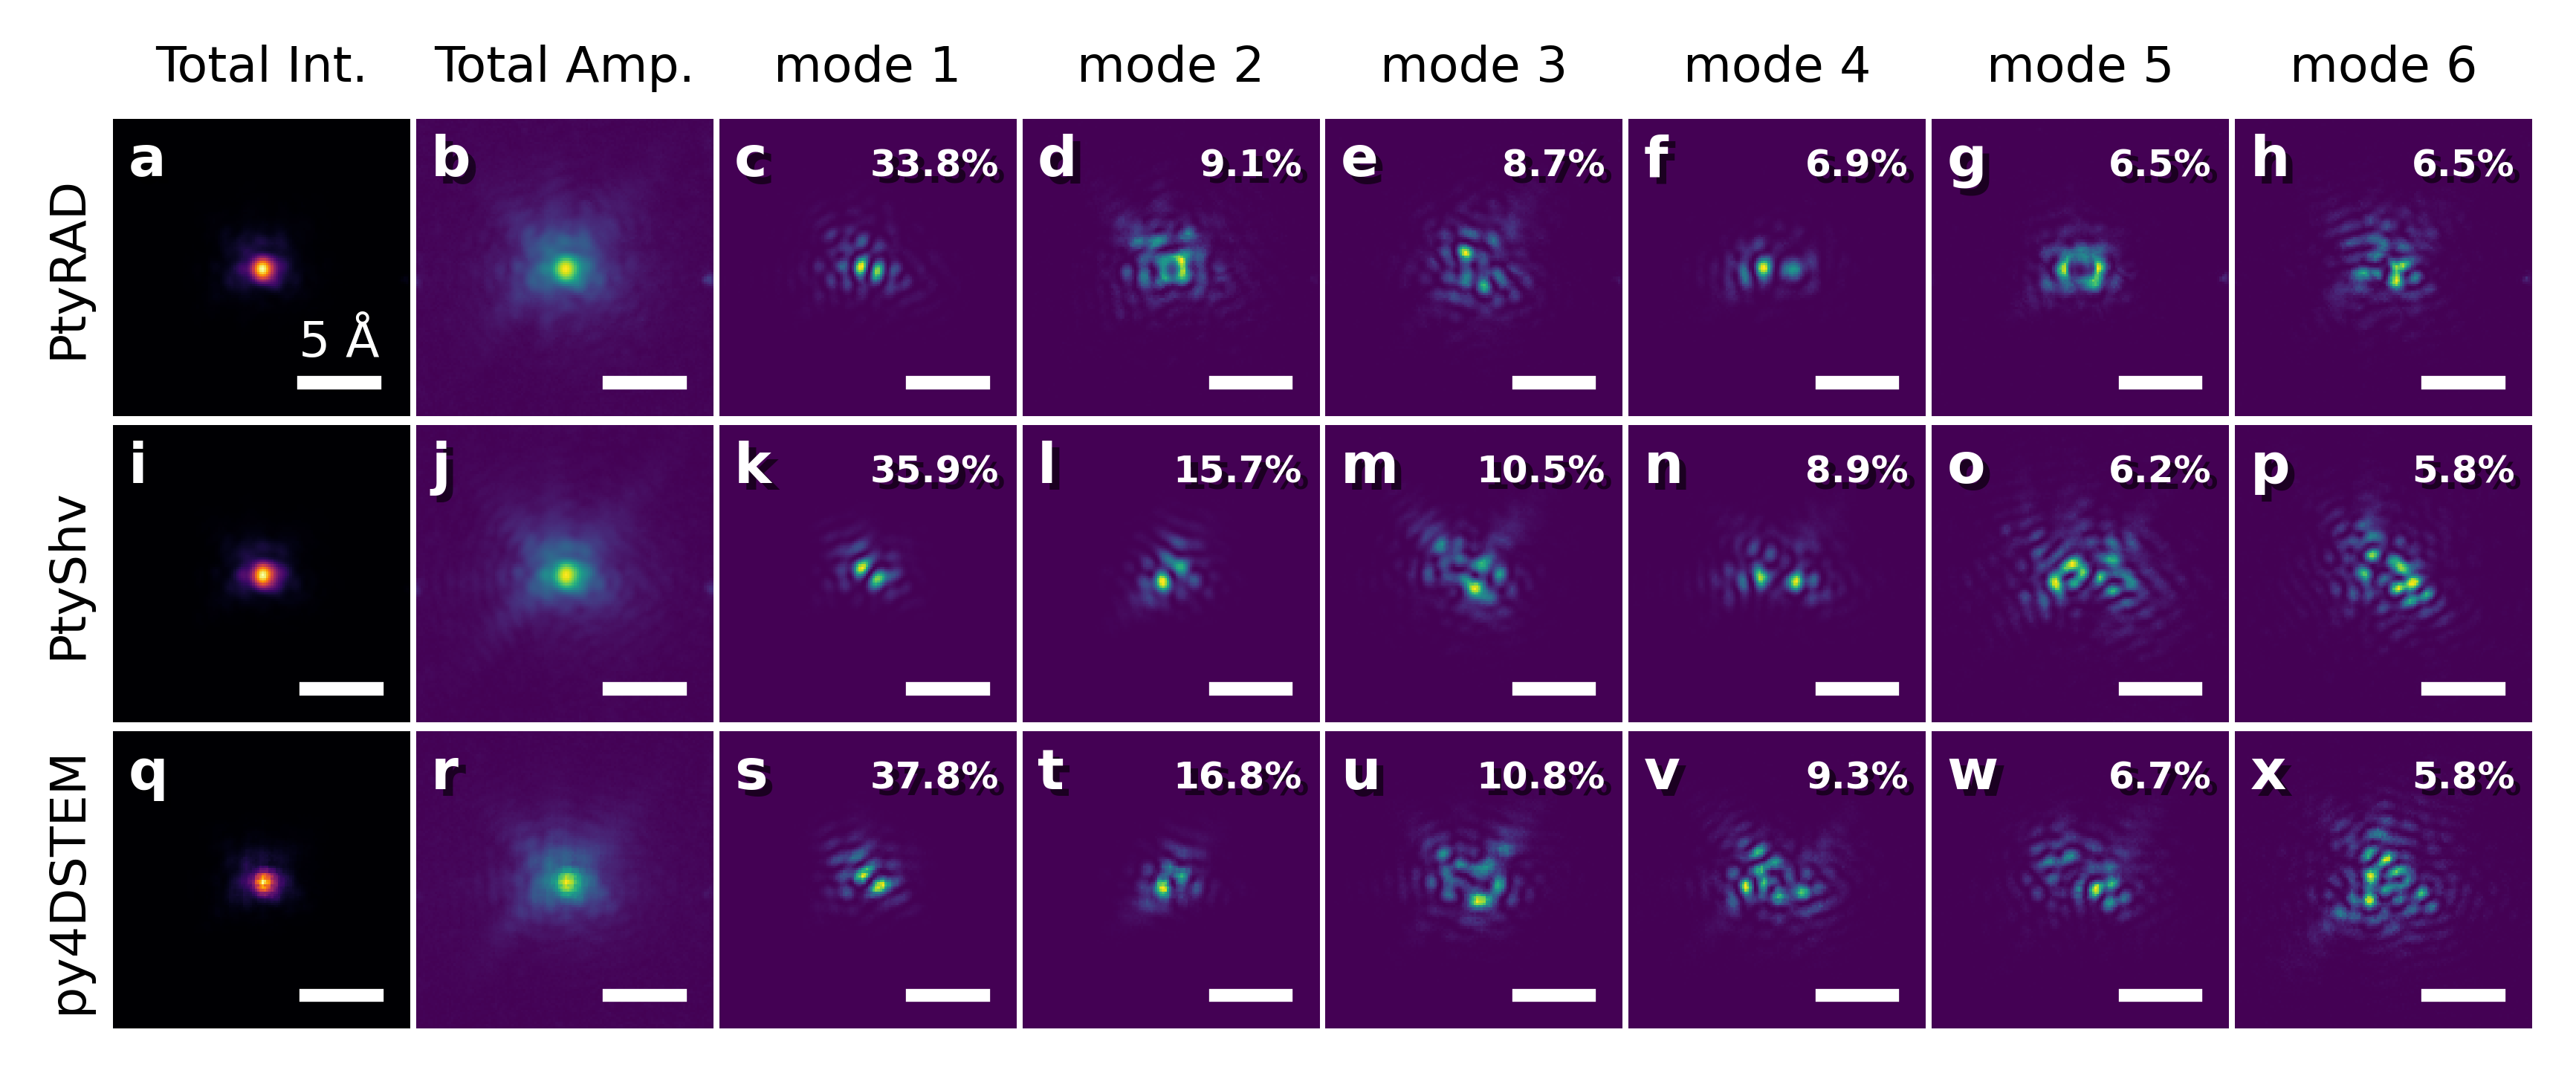

In [7]:
import numpy as np
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import string

# Create overall stack
probes = np.stack([probe_ptyrad, probe_ptyshv, probe_py4dstem])
pmode_max = 6 # Plot to this probe mode for simplicity

# Labels
row_labels = ['PtyRAD', 'PtyShv', 'py4DSTEM']
col_labels = ['Total Int.', 'Total Amp.'] + [f'mode {i}' for i in range(1, pmode_max + 1)]
num_rows = len(row_labels)
num_cols = len(col_labels)
total_panels = num_rows * num_cols

if total_panels > len(string.ascii_lowercase):
    raise ValueError("Too many panels for single-letter labels. Consider using double letters.")
panel_labels = np.array(list(string.ascii_lowercase[:total_panels])).reshape(num_rows, num_cols)

# Figure configuration
figsize=(7,2.9)
hspace=-0.2
int_cmap='inferno'
amp_cmap='viridis'
shadow_offset = (3, 3)
fontsize_row_label = 8
fontsize_panel_label = 9
fontsize_mode_label = 8
fontsize_power_label = 6

# Define figure and GridSpec layout
fig = plt.figure(figsize=figsize, dpi=600)
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.02, hspace=hspace, figure=fig)

# Iterate over rows (methods) and columns (modes)
for i, row_label in enumerate(row_labels):
    for j, mode_label in enumerate(col_labels):
        ax = fig.add_subplot(gs[i, j])

        # Scale bar settings
        scale_bar_length = 5/pixel_size # Length in pixels
        scale_bar_label = "5 $\\mathrm{\\AA}$"  
        scale_bar_color = "white"
        fontprops = fm.FontProperties(size=8)

        # Main image
        probe = probes[i]
        probe_int = np.sum(np.abs(probe)**2, 0)
        probe_amp = probe_int**0.5
        probe_pow = np.sum(np.abs(probe)**2, (-2,-1)) / np.sum(np.abs(probe)**2)
        probe_modes = np.abs(probe)**2

        if j == 0:
            ax.imshow(probe_int, cmap=int_cmap, origin='upper')
        elif j == 1:
            ax.imshow(probe_amp, cmap=amp_cmap, origin='upper')
        else:
            ax.imshow(probe_modes[j], cmap=amp_cmap, origin='upper')
            # power label
            pow_str = f'{probe_pow[j-2]:.1%}'
            ax.text(120 + shadow_offset[0], 12 + shadow_offset[1], pow_str, color='black', fontsize=fontsize_power_label, fontweight='bold', va='top', ha='right', alpha=0.6)
            ax.text(120, 12, pow_str, color='white', fontsize=fontsize_power_label, fontweight='bold', ha='right', va='top')
        ax.axis('off')

        # mode label for the top row
        if i == 0:
            ax.set_title(mode_label, fontsize=fontsize_mode_label)

        # Panel label
        ax.text(6 + shadow_offset[0], 6 + shadow_offset[1], panel_labels[i, j], color='black', fontsize=fontsize_panel_label, fontweight='bold', va='top', ha='left', alpha=0.6)
        ax.text(6, 6, panel_labels[i, j], color='white', fontsize=fontsize_panel_label, fontweight='bold', va='top', ha='left')
        
        # Add scale bar
        if i == 0 and j == 0:
            scalebar = AnchoredSizeBar(ax.transData, scale_bar_length, scale_bar_label,
                                loc='lower right', pad=0.5, color=scale_bar_color, frameon=False, size_vertical=3, label_top=True,
                                fontproperties=fontprops)
        else:
            scalebar = AnchoredSizeBar(ax.transData, scale_bar_length, '',
                                    loc='lower right', pad=0.5, color=scale_bar_color, frameon=False, size_vertical=3, label_top=True,
                                    fontproperties=fontprops)
        ax.add_artist(scalebar)

        # Add row labels on the leftmost column
        if j == 0:
            ax.annotate(row_label, xy=(-0.15, 0.5), xycoords='axes fraction', fontsize=fontsize_row_label, ha='center', va='center', rotation=90)


plt.savefig("05_figures/Fig_SXX_mixed_probes_exp_a100.pdf", bbox_inches="tight")

# Show the plot
plt.show()
